In [9]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
data = np.array([[1.1, 0.3], [2.1, 0.6], [-1.1, -0.4], [0, -3.2]])
data2 = np.array([
[ 1.7, 0.4],
[ 4.2, 1.25],
[-8.1, 1.2]])
cos_sims = cosine_similarity(data)
# cos_sims = cosine_similarity(data, data2)
# cos_sims

# find most similar that is not self
np.fill_diagonal(cos_sims, 0)
similar_indexes = cos_sims.argmax(axis=1)

similar_indexes

array([1, 0, 3, 2], dtype=int64)

In [14]:
# nearest neighbors
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=2)
data = np.array([
[5.1, 3.5, 1.4, 0.2],
[4.9, 3. , 1.4, 0.2],
[4.7, 3.2, 1.3, 0.2],
[4.6, 3.1, 1.5, 0.2],
[5. , 3.6, 1.4, 0.2],
[5.4, 3.9, 1.7, 0.4],
[4.6, 3.4, 1.4, 0.3],
[5. , 3.4, 1.5, 0.2],
[4.4, 2.9, 1.4, 0.2],
[4.9, 3.1, 1.5, 0.1]])

nbrs.fit(data)
new_obs = np.array([
[5. , 3.5, 1.6, 0.3],
[4.8, 3.2, 1.5, 0.1]])

dists, knbrs = nbrs.kneighbors(new_obs)

print(dists)
print(knbrs)

[[0.17320508 0.24494897]
 [0.14142136 0.24494897]]
[[7 0]
 [9 2]]


In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
print(kmeans.predict(new_obs))

[0 1 1 1 0 2 1 0 1 1]
[[5.03333333 3.5        1.43333333 0.2       ]
 [4.68333333 3.11666667 1.41666667 0.2       ]
 [5.4        3.9        1.7        0.4       ]]
[0 1]


In [25]:
import pandas as pd
from sklearn.cluster import FeatureAgglomeration
mlb_df = pd.read_csv('baseballdatabank-master/core/Batting.csv')
mlb_df['BA'] = mlb_df['H'] / mlb_df['AB']
mlb_df['1B'] = mlb_df['H'] - (mlb_df['2B'] + mlb_df['3B'] + mlb_df['HR'])

sub_df = mlb_df[['AB', '1B', '2B', '3B', 'HR']]
X = np.array(sub_df)
agg = FeatureAgglomeration()
new_data = agg.fit_transform(sub_df)

In [28]:
import matplotlib.pyplot as plt

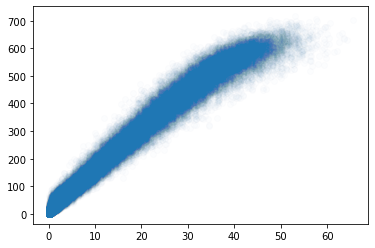

In [41]:
plt.scatter(new_data.T[0], new_data.T[1], alpha=0.01)


In [38]:
agg_y = np.sum(new_data ** 2, axis=1)

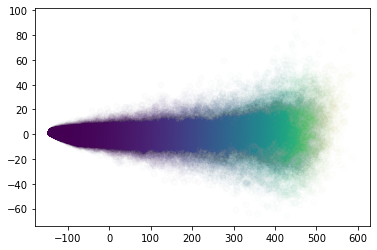

In [40]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca_x = pca.fit_transform(sub_df)
plt.scatter(pca_x.T[0], pca_x.T[1], c=agg_y, alpha=0.01)

In [44]:
A = np.array([
    [1,0,-1],
    [0,1,1],
    [-1,1,1]
])
b = np.array([1,2,-1])

In [46]:
np.linalg.solve(A, b)

array([3., 0., 2.])